In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import torch.nn.functional as F

from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from IPython import display


In [ ]:
#parameters
num_epochs = 1
learning_rate = 0.001

In [ ]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#load data
train_dataroot = "/content/drive/MyDrive/minorproject_dataset_1/train"
dataset = dset.ImageFolder(root=train_dataroot,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1,
                                         shuffle=True)

train_dataroot1 = "/content/drive/MyDrive/minorproject_dataset_2/fore_ground_blur/train"

train_dataset1 = dset.ImageFolder(root=train_dataroot1,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader1 = torch.utils.data.DataLoader(train_dataset1, batch_size=1,
                                         shuffle=True)


test_dataroot1 = "/content/drive/MyDrive/minorproject_dataset_2/fore_ground_blur/test"

test_dataset1 = dset.ImageFolder(root=test_dataroot1,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader1 = torch.utils.data.DataLoader(test_dataset1, batch_size=1,
                                         shuffle=False)


train_dataroot2 = "/content/drive/MyDrive/minorproject_dataset_2/back_ground_blur/train"

train_dataset2 = dset.ImageFolder(root=train_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader2 = torch.utils.data.DataLoader(train_dataset2, batch_size=1,
                                         shuffle=True)


test_dataroot2 = "/content/drive/MyDrive/minorproject_dataset_2/back_ground_blur/test"

test_dataset2 = dset.ImageFolder(root=test_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=1,
                                         shuffle=False)


train_dataroot3 = "/content/drive/MyDrive/minorproject_dataset_2/sharp/train"

train_dataset3 = dset.ImageFolder(root=train_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

train_dataloader3 = torch.utils.data.DataLoader(train_dataset2, batch_size=1,
                                         shuffle=True)


test_dataroot3 = "/content/drive/MyDrive/minorproject_dataset_2/sharp/test"
test_dataset3 = dset.ImageFolder(root=test_dataroot2,
                           transform=transforms.Compose([transforms.Resize(size=(128,128)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

test_dataloader3 = torch.utils.data.DataLoader(test_dataset2, batch_size=1,
                                         shuffle=False)

In [ ]:
#Network Architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 9, kernel_size=(3,3),padding=1)
        self.conv2 = nn.Conv2d(9, 27, kernel_size=(3,3),padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), return_indices=True)
        self.conv3 = nn.Conv2d(27, 81, kernel_size=(3,3),padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), return_indices=True)
        self.maxunpool1 = nn.MaxUnpool2d(kernel_size=(2,2))
        self.unconv1 = nn.ConvTranspose2d(81,27,kernel_size=(3,3), padding=1)
        self.maxunpool2 = nn.MaxUnpool2d(kernel_size=(2,2))
        self.unconv2 = nn.ConvTranspose2d(27,9,kernel_size=(3,3), padding=1)
        self.unconv3 = nn.ConvTranspose2d(9,3,kernel_size=(3,3),padding=1)
        

    def Encoder(self, x):
        x = self.conv1(x)
        x= nn.Tanh()(x)
        x= self.conv2(x)
        x= nn.Tanh()(x)
        x,indices1 = self.maxpool1(x)
        x= nn.Tanh()(x)
        x= self.conv3(x)
        x= nn.Tanh()(x)
        x,indices2 = self.maxpool2(x)
        x= nn.Tanh()(x)
        return x,indices1,indices2

    def Decoder(self, x,indices1,indices2):
        x = self.maxunpool2(x, indices2)
        x= nn.Tanh()(x)
        x = self.unconv1(x)
        x= nn.Tanh()(x)  
        x = self.maxunpool1(x,indices1)
        x= nn.Tanh()(x)
        x = self.unconv2(x)
        x= nn.Tanh()(x)
        x = self.unconv3(x)
        return x
   ############################################ 
  
    def forward(self, x):
        latent,i1,i2 = self.Encoder(x)
        output = self.Decoder(latent,i1,i2)
        return output
        

    ##########################################################################################################################################
    


In [ ]:
#printing the number of parameters
model = Autoencoder().to(device)

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters: %d' % num_params)

Number of parameters: 44382


In [ ]:
#training
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=1e-5) 
train_loss_avg = []

print('Training ...')
for epoch in range(num_epochs):
    train_loss_avg.append(0)
    num_batches = 0
    
    for image_batch , _ in dataloader:
      
        image_batch = image_batch.to(device)
        
        # autoencoder reconstruction
        image_batch_recon = model.forward(image_batch)
        #L,I1,I2= model.Encoder(image_batch)
        #image_batch_recon=model.Decoder(L,I1,I2)
        # reconstruction error
        loss = F.mse_loss(image_batch_recon, image_batch)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        train_loss_avg[-1] += loss.item()
        num_batches += 1
        

    train_loss_avg[-1] /= num_batches
    print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, num_epochs, train_loss_avg[-1]))

Training ...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:693: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch._C._nn.max_pool2d_with_indices(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1 / 1] average reconstruction error: 0.008178


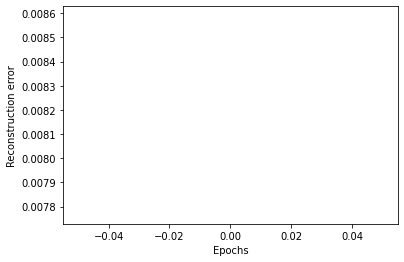

In [ ]:
#plotting graph
import matplotlib.pyplot as plt
plt.ion()
fig = plt.figure()
plt.plot(train_loss_avg)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [ ]:
FILE = "/content/drive/My Drive/minorproject_model_save/trained_model.pt"
torch.save(model, FILE)


In [ ]:
model.eval()
def Load(dataloader,latentpath,I1_path,I2_path):
    count=0
    for image_batch, _ in dataloader:  
        with torch.no_grad():
            image_batch = image_batch.to(device)
            # autoencoder reconstruction
            L,I1,I2 = model.Encoder(image_batch)
            
            b=len(image_batch)
            for i in range(b):
                count+=1
                L_image=L[i] 
                I1_image=I1[i] 
                I2_image=I2[i] 

                torch.save(L_image.unsqueeze(0), latentpath.format(count)) 
                #torch.save(I1_image.unsqueeze(0), I1_path.format(count)) 
                #torch.save(I2_image.unsqueeze(0), I2_path.format(count)) 
    
latent_path_good_test="/content/drive/MyDrive/minor_project_latent/test/blurs/fore_ground_blur/Latent_{}.txt"
#latent_path_good_test="/content/drive/MyDrive/drill_save/test/drilling/good/Latent_{}.txt"
I1_path_good_test="/content/drive/MyDrive/minor_project_save/test/blurs/fore_ground_blur/I1_{}.txt"
I2_path_good_test="/content/drive/MyDrive/minor_project_save/test/blurs/fore_ground_blur/I2_{}.txt"
Load(test_dataloader1,latent_path_good_test,I1_path_good_test,I2_path_good_test)

latent_path_average_test="/content/drive/MyDrive/minor_project_latent/test/blurs/back_ground_blur/Latent_{}.txt"
#latent_path_average_test="/content/drive/MyDrive/drill_save/test/drilling/average/Latent_{}.txt"
I1_path_average_test="/content/drive/MyDrive/minor_project_save/test/blurs/back_ground_blur/I1_{}.txt"
I2_path_average_test="/content/drive/MyDrive/minor_project_save/test/blurs/back_ground_blur/I2_{}.txt"
Load(test_dataloader2,latent_path_average_test,I1_path_average_test,I2_path_average_test)

latent_path_bad_test="/content/drive/MyDrive/minor_project_latent/test/blurs/sharp/Latent_{}.txt"
#latent_path_bad_test="/content/drive/MyDrive/drill_save/test/drilling/bad/Latent_{}.txt"
I1_path_bad_test="/content/drive/MyDrive/minor_project_save/test/blurs/sharp/I1_{}.txt"
I2_path_bad_test="/content/drive/MyDrive/minor_project_save/test/blurs/sharp/I2_{}.txt"
Load(test_dataloader3,latent_path_bad_test,I1_path_bad_test,I2_path_bad_test)

latent_path_good_train="/content/drive/MyDrive/minor_project_latent/train/blurs/fore_ground_blur/Latent_{}.txt"
#latent_path_good_train="/content/drive/MyDrive/drill_save/train/drilling/good/Latent_{}.txt"
I1_path_good_train="/content/drive/MyDrive/minor_project_save/train/blurs/fore_ground_blur/I1_{}.txt"
I2_path_good_train="/content/drive/MyDrive/minor_project_save/train/blurs/fore_ground_blur/I2_{}.txt"
Load(train_dataloader1,latent_path_good_train,I1_path_good_train,I2_path_good_train)

latent_path_average_train="/content/drive/MyDrive/minor_project_latent/train/blurs/back_ground_blur/Latent_{}.txt"
#latent_path_average_train="/content/drive/MyDrive/drill_save/train/drilling/average/Latent_{}.txt"
I1_path_average_train="/content/drive/MyDrive/minor_project_save/train/blurs/back_ground_blur/I1_{}.txt"
I2_path_average_train="/content/drive/MyDrive/minor_project_save/train/blurs/back_ground_blur/I2_{}.txt"
Load(train_dataloader2,latent_path_average_train,I1_path_average_train,I2_path_average_train)

latent_path_bad_train="/content/drive/MyDrive/minor_project_latent/train/blurs/sharp/Latent_{}.txt"
#latent_path_bad_train="/content/drive/MyDrive/drill_save/train/drilling/bad/Latent_{}.txt"
I1_path_bad_train="/content/drive/MyDrive/minor_project_save/train/blurs/sharp/I1_{}.txt"
I2_path_bad_train="/content/drive/MyDrive/minor_project_save/train/blurs/sharp/I2_{}.txt"
Load(train_dataloader3,latent_path_bad_train,I1_path_bad_train,I2_path_bad_train)

KeyboardInterrupt: ignored

In [ ]:
'''
#testing again
#set to evaluation mode
plt.ion()

import torchvision.utils

model.eval()

def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x
    
# autoencoder reconstruction

print('Reconstructed images')

with torch.no_grad():
  for count in range(1,25):

    loadlatent=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/Latent_{}.txt".format(count)))
    loadlatent=torch.unsqueeze(torch.reshape(loadlatent,(81,32,32)),0)
    loadlatent=loadlatent.type(torch.float32)

    loadI1=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/I1_{}.txt".format(count)))
    loadI1=torch.unsqueeze(torch.reshape(loadI1,(27,64,64)),0)
    loadI1=loadI1.type(torch.int64)

    loadI2=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/I2_{}.txt".format(count)))
    loadI2=torch.unsqueeze(torch.reshape(loadI2,(81,32,32)),0)
    loadI2=loadI2.type(torch.int64)

    image_batch_recon=model.Decoder(loadlatent, loadI1, loadI2)

    # reconstruction error
    loss = F.mse_loss(image_batch_recon, image_batch)

    test_loss_avg += loss.item()
    num_batches += 1

    image_batch_recon = image_batch_recon.cpu()
    image_batch_recon = to_img(image_batch_recon)
    np_imagegrid = torchvision.utils.make_grid(image_batch_recon[:24], 10, 5).numpy()
    plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
    plt.show()

      
  test_loss_avg /= num_batches
  print('average reconstruction error: %f' % (test_loss_avg))
'''
  

'\n#testing again\n#set to evaluation mode\nplt.ion()\n\nimport torchvision.utils\n\nmodel.eval()\n\ndef to_img(x):\n    x = 0.5 * (x + 1)\n    x = x.clamp(0, 1)\n    return x\n    \n# autoencoder reconstruction\n\nprint(\'Reconstructed images\')\n\nwith torch.no_grad():\n  for count in range(1,25):\n\n    loadlatent=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/Latent_{}.txt".format(count)))\n    loadlatent=torch.unsqueeze(torch.reshape(loadlatent,(81,32,32)),0)\n    loadlatent=loadlatent.type(torch.float32)\n\n    loadI1=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/I1_{}.txt".format(count)))\n    loadI1=torch.unsqueeze(torch.reshape(loadI1,(27,64,64)),0)\n    loadI1=loadI1.type(torch.int64)\n\n    loadI2=torch.from_numpy(np.loadtxt("/content/drive/My Drive/Encoded_values/I2_{}.txt".format(count)))\n    loadI2=torch.unsqueeze(torch.reshape(loadI2,(81,32,32)),0)\n    loadI2=loadI2.type(torch.int64)\n\n    image_batch_recon=model.Decoder(load

In [ ]:
'''#testing
#set to evaluation mode

import numpy as np

model.eval()

def loadLatent(dataloader, latent_path, I1_path, I2_path):

  count=0
  test_loss_avg, num_batches = 0, 0

  for image_batch, _ in dataloader:  
      with torch.no_grad():
          image_batch = image_batch.to(device)
          # autoencoder reconstruction
          L,I1,I2 = model.Encoder(image_batch)
          
          b=len(image_batch)
          for i in range(b):
              count+=1
              L_image=torch.reshape(L[i] , (L.shape[1]*L.shape[2] , L.shape[3] ))
              I1_image=torch.reshape(I1[i] , (I1.shape[1]*I1.shape[2] , I1.shape[3] ))
              I2_image=torch.reshape(I2[i] , (I2.shape[1]*I2.shape[2] , I2.shape[3] ))
                  
              np.savetxt(latent_path, L_image )
              np.savetxt(I1_path, I1_image )
              np.savetxt(I2_path, I2_image )
        
test_latent = "/content/drive/My Drive/Encoded_values/Latent_{}.txt".format(count)
test_I1= "/content/drive/My Drive/Encoded_values/I1_{}.txt".format(count)
test_I2= "/content/drive/My Drive/Encoded_values/I2_{}.txt".format(count)
loadLatent(test_dataloader,test_latent,test_I1,test_I2)
'''

'#testing\n#set to evaluation mode\n\nimport numpy as np\n\nmodel.eval()\n\ndef loadLatent(dataloader, latent_path, I1_path, I2_path):\n\n  count=0\n  test_loss_avg, num_batches = 0, 0\n\n  for image_batch, _ in dataloader:  \n      with torch.no_grad():\n          image_batch = image_batch.to(device)\n          # autoencoder reconstruction\n          L,I1,I2 = model.Encoder(image_batch)\n          \n          b=len(image_batch)\n          for i in range(b):\n              count+=1\n              L_image=torch.reshape(L[i] , (L.shape[1]*L.shape[2] , L.shape[3] ))\n              I1_image=torch.reshape(I1[i] , (I1.shape[1]*I1.shape[2] , I1.shape[3] ))\n              I2_image=torch.reshape(I2[i] , (I2.shape[1]*I2.shape[2] , I2.shape[3] ))\n                  \n              np.savetxt(latent_path, L_image )\n              np.savetxt(I1_path, I1_image )\n              np.savetxt(I2_path, I2_image )\n        \ntest_latent = "/content/drive/My Drive/Encoded_values/Latent_{}.txt".format(count)